# Machine Learning - Assignment II

# Assignment 2a

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve
import warnings
warnings.filterwarnings(action='ignore')

## Load Data & Simple EDA

In [5]:
PATH = "./data/data.csv"

In [6]:
# Load the data (CSV) file.

df = pd.read_csv(PATH)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


False    10422
True      1908
Name: Revenue, dtype: int64


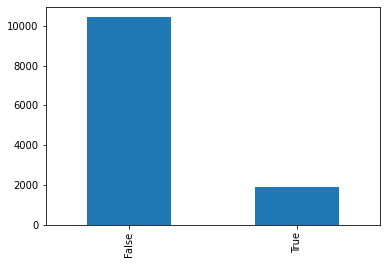

In [7]:
# Distribution of target variable

print(df.Revenue.value_counts())
df.Revenue.value_counts().plot(kind='bar')

Target variable Revenue is extremely unbalanced. Metrics must be considered when evaluating models.

### Inspect individual features to ensure they are in the right datatype.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
print(df.OperatingSystems.unique())
print(df.Browser.unique())
print(df.Region.unique())
print(df.TrafficType.unique())
print(df.Weekend.unique())
print(df.VisitorType.unique())

[1 2 4 3 7 6 8 5]
[ 1  2  3  4  5  6  7 10  8  9 12 13 11]
[1 9 2 3 4 5 6 7 8]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
[False  True]
['Returning_Visitor' 'New_Visitor' 'Other']


Dtype of features OperatingSystems, Browser, Region, TrafficType, VisitorType containing meaningful categorical data must be coded rightly.  
We decided to leave Boolean as original format.

## One Hot Encoding

In [10]:
df.drop(['Month'], axis=1, inplace=True)

Variable Month has been excluded as written in the instruction.

In [11]:
df = pd.get_dummies(df, columns=['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'VisitorType'])

In [12]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Weekend_False,Weekend_True,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,False,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## Train / Test Split & Define Model Train / Report Function

In [13]:
X = df.drop(['Revenue'], axis=1)
y = df.Revenue
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [14]:
scaler_minmax = ('scaler_minmax', MinMaxScaler())
scaler_std = ('scaler_std', StandardScaler())

In [15]:
# First, to discover statistics of unscaled X

X.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Weekend_False,Weekend_True,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,0.209651,0.535361,0.207218,0.038767,0.000487,0.001541,0.000568,0.006407,0.199676,0.645661,0.008516,0.059692,0.037875,0.014112,0.003974,0.010949,0.000081,0.013220,0.000487,0.000811,0.004947,0.387672,0.092133,0.194891,0.095864,0.025791,0.065288,0.061719,0.035199,0.041444,0.198783,0.317356,0.166423,0.086699,0.021087,0.036010,0.003244,0.027818,0.003406,0.036496,0.020032,0.000081,0.059854,0.001054,0.003082,0.000243,0.000081,0.000811,0.001379,0.016058,0.767397,0.232603,0.137388,0.006894,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.407076,0.498768,0.405330,0.193048,0.022055,0.039226,0.023821,0.079791,0.399773,0.478332,0.091891,0.236925,0.190902,0.117957,0.062917,0.104067,0.009006,0.114219,0.022055,0.028468,0.070166,0.487239,0.289225,0.396132,0.294416,0.158517,0.247043,0.240655,0.184289,0.199322,0.399101,0.465466,0.372475,0.281405,0.143680,0.186322,0.056867,0.164459,0.058267,0.187529,0.140117,0.009006,0.237226,0.032455,0.055432,0.015597,0.009006,0.028468,0.037107,0.125705,0.422509,0.422509,0.344271,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

Before applying scalers to pipelines, we wanted to see how data will be changed through above scalers.

In [16]:
# MinMax scale and discover its statistics

scaler_minmax_pre = MinMaxScaler()
scaler_minmax_pre.fit(X)
X_minmax_scaled = scaler_minmax_pre.transform(X)
X_df_minmax_scaled = pd.DataFrame(data=X_minmax_scaled, columns=X.columns)
X_df_minmax_scaled.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Weekend_False,Weekend_True,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.085747,0.023779,0.020982,0.013522,0.045009,0.018676,0.110957,0.215364,0.016279,0.061427,0.209651,0.535361,0.207218,0.038767,0.000487,0.001541,0.000568,0.006407,0.199676,0.645661,0.008516,0.059692,0.037875,0.014112,0.003974,0.010949,0.000081,0.013220,0.000487,0.000811,0.004947,0.387672,0.092133,0.194891,0.095864,0.025791,0.065288,0.061719,0.035199,0.041444,0.198783,0.317356,0.166423,0.086699,0.021087,0.036010,0.003244,0.027818,0.003406,0.036496,0.020032,0.000081,0.059854,0.001054,0.003082,0.000243,0.000081,0.000811,0.001379,0.016058,0.767397,0.232603,0.137388,0.006894,0.855718
std,0.123029,0.052013,0.052923,0.055209,0.063086,0.029913,0.242442,0.242983,0.051328,0.198917,0.407076,0.498768,0.405330,0.193048,0.022055,0.039226,0.023821,0.079791,0.399773,0.478332,0.091891,0.236925,0.190902,0.117957,0.062917,0.104067,0.009006,0.114219,0.022055,0.028468,0.070166,0.487239,0.289225,0.396132,0.294416,0.158517,0.247043,0.240655,0.184289,0.199322,0.399101,0.465466,0.372475,0.281405,0.143680,0.186322,0.056867,0.164459,0.058267,0.187529,0.140117,0.009006,0.237226,0.032455,0.055432,0.015597,0.009006,0.028468,0.037107,0.125705,0.422509,0.422509,0.344271,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.009929,0.002878,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

From the upper table, we confirm that minimum and maximum values of each features are transformed to 0 and 1, respectively.

In [17]:
# Std scale and discover its statistics

scaler_std_pre = StandardScaler()
scaler_std_pre.fit(X)
X_std_scaled = scaler_std_pre.transform(X)
X_df_std_scaled = pd.DataFrame(data=X_std_scaled, columns=X.columns)
X_df_std_scaled.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Weekend_False,Weekend_True,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04,1.233000e+04
mean,-1.375191e-15,2.074316e-15,6.987391e-15,1.765777e-16,-2.849753e-16,1.021684e-15,1.333384e-15,-2.622846e-16,-4.953810e-15,-1.722823e-14,-2.456771e-15,3.265694e-15,-3.776379e-16,-7.903924e-16,-2.185670e-15,5.273886e-16,-1.046237e-15,4.966094e-15,2.351710e-15,5.309801e-16,2.179123e-15,4.922808e-15,-6.044232e-16,5.243026e-15,1.217970e-15,3.942555e-15,3.027913e-16,1.216588e-15,-2.185670e-15,1.060069e-15,-2.265294e-15,1.440499e-16,-5.776518e-15,1.033552e-16,-1.191081e-16,7.690748e-16,-3.420675e-15,-6.021947e-16,5.724357e-16,4.716354e-15,-3.252233e-15,-1.353869e-14,1.259176e-14,1.328133e-14,2.031663e-15,-4.036187e-15,-5.393530e-16,7.021341e-15,-1.203474e-15,-5.247479e-15,4.216322e-15,3.039447e-16,-3.530779e-15,2.751597e-15,-1.860492e-15,3.524556e-16,2.958769e-16,2.540365e-15,3.910388e-15,-3.962632e-16,5.852037e-16,-5.903901e-16,9.192250e-16,1.651138e-14,-8.831180e-15
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-6.969930e-01,-4.571914e-01,-3.964779e-01,-2.449305e-01,-7.134884e-01,-6.243475e-01,-4.576830e-01,-8.863706e-01,-3.171778e-01,-3.088214e-01,-5.150381e-01,-1.073410e+00,-5.112544e-01,-2.008252e-01,-2.206479e-02,-3.928531e-02,-2.383366e-02,-8.030226e-02,-4.994931e-01,-1.349873e+00,-9.267663e-02,-2.519546e-01,-1.984089e-01,-1.196408e-01,-6.316568e-02,-1.052146e-01,-9.006086e-03,-1.157449e-01,-2.206479e-02,-2.849014e-02,-7.051156e-02,-7.956837e-01,-3.185639e-01,-4.920031e-01,-3.256194e-01,-1.627069e-

From the upper table, standard deviations are transformed to almost 1.

In [18]:
def pipeline_generator(model_idx, params, cv=5):
    """
    PARAMS
    ------
    # model: 0-LinearSVC, 1-LogisticRegression, 2-KNeighborsClassifier, 3-DecisionTreeClassifier, 4-RandomForestClassifier
    # params - ex {'model__C':list(), 'model__max_iter':list()}
    # cv
    """
    # Select model to train
    models = [LinearSVC(), 
              LogisticRegression(), 
              KNeighborsClassifier(), 
              DecisionTreeClassifier(), 
              RandomForestClassifier(random_state=156, n_jobs=-1)]
    selected_model = models[model_idx]
    clf = ('model', selected_model)
    
    # Create pipelines for cases: unscaled, minmax scaled, standard scaled.
    pipe_unscaled = Pipeline([clf])
    pipe_minmax_scaled = Pipeline([scaler_minmax, clf])
    pipe_std_scaled = Pipeline([scaler_std, clf])
    
    # Hyper parameter tuning via GridSearchCV
    grid_unscaled = GridSearchCV(pipe_unscaled, scoring='accuracy', n_jobs=-1, param_grid=params, cv=cv)
    grid_minmax_scaled = GridSearchCV(pipe_minmax_scaled, scoring='accuracy', n_jobs=-1, param_grid=params, cv=cv)
    grid_std_scaled = GridSearchCV(pipe_std_scaled, scoring='accuracy', n_jobs=-1, param_grid=params, cv=cv)

    # Model train
    grid_unscaled.fit(X_train, y_train)
    grid_minmax_scaled.fit(X_train, y_train)
    grid_std_scaled.fit(X_train, y_train)
    
    # Show parameters with best score
    print('Best parameter(Unscaled): ', grid_unscaled.best_params_)
    print('Best parameter(MinMax Scaled): ', grid_minmax_scaled.best_params_)
    print('Best parameter(Std Scaled): ', grid_std_scaled.best_params_)
    print()
    print('Best score(Unscaled): ', grid_unscaled.best_score_)
    print('Best score(MinMax Scaled): ', grid_minmax_scaled.best_score_)
    print('Best score(Std Scaled): ', grid_std_scaled.best_score_)
    print()
    
    results = [grid_unscaled.cv_results_, grid_minmax_scaled.cv_results_, grid_std_scaled.cv_results_]
    
    # Classification Report
    pred_unscaled = grid_unscaled.predict(X_test)
    pred_minmax_scaled = grid_minmax_scaled.predict(X_test)
    pred_std_scaled = grid_std_scaled.predict(X_test)
    
    print('Classification report - Unscaled')
    print(classification_report(y_test, pred_unscaled))
    print()
    print('Classification report - MinMax Scaled')
    print(classification_report(y_test, pred_minmax_scaled))
    print()
    print('Classification report - Std Scaled')
    print(classification_report(y_test, pred_std_scaled))
    
    # Calculate predict proba manually as LinearSVC from scikit learn does not support direct calculation
    def linear_svc_proba(model, X):
        Y = model.decision_function(X)
        prob = (Y - Y.min()) / (Y.max() - Y.min())
        false_proba = 1-prob
        true_proba = prob
        return false_proba, true_proba
    
    # For LinearSVC
    if model_idx == 0:
        false_proba, true_proba_unscaled = linear_svc_proba(grid_unscaled, X_test)
        false_proba, true_proba_minmax_scaled = linear_svc_proba(grid_minmax_scaled, X_test)
        false_proba, true_proba_std_scaled = linear_svc_proba(grid_std_scaled, X_test)
    
    # Other models support predict_proba
    else:
        true_proba_unscaled = grid_unscaled.predict_proba(X_test)[:, 1]
        true_proba_minmax_scaled = grid_minmax_scaled.predict_proba(X_test)[:, 1]
        true_proba_std_scaled = grid_std_scaled.predict_proba(X_test)[:, 1]
    
    proba_list = [true_proba_unscaled, true_proba_minmax_scaled, true_proba_std_scaled]
    
    # Plot ROC Curves
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)
    for ax, proba, title in zip([ax1, ax2, ax3], proba_list, ["Unscaled", "Minmax Scaled", "Std Scaled"]):
        fprs, tprs, thresholds = roc_curve(y_test, proba)
        ax.set_title(title)
        ax.plot(fprs, tprs, label='ROC')
        ax.plot([0, 1], [0, 1], 'k--', label='Random')
        start, end = ax.set_xlim()
        ax.set_xticks(np.round(np.arange(start, end, 0.1), 2))
        ax.set_xlim(0, 1); ax.set_ylim(0, 1)
        ax.set_xlabel('FPR( 1 - Sensitivity )'); ax.set_ylabel('TPR( Recall )')
        ax.legend()
    plt.show()
    
    return results, proba_list

## Linear SVM

Best parameter(Unscaled):  {'model__C': 0.01, 'model__max_iter': 10000}
Best parameter(MinMax Scaled):  {'model__C': 20.01, 'model__max_iter': 10000}
Best parameter(Std Scaled):  {'model__C': 10.01, 'model__max_iter': 10000}

Best score(Unscaled):  0.8660786699107867
Best score(MinMax Scaled):  0.8803730738037308
Best score(Std Scaled):  0.8803730738037308

Classification report - Unscaled
              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2098
        True       0.69      0.46      0.55       368

    accuracy                           0.89      2466
   macro avg       0.80      0.71      0.74      2466
weighted avg       0.88      0.89      0.88      2466


Classification report - MinMax Scaled
              precision    recall  f1-score   support

       False       0.89      0.98      0.94      2098
        True       0.75      0.34      0.47       368

    accuracy                           0.88      2466
   macro avg       0.82

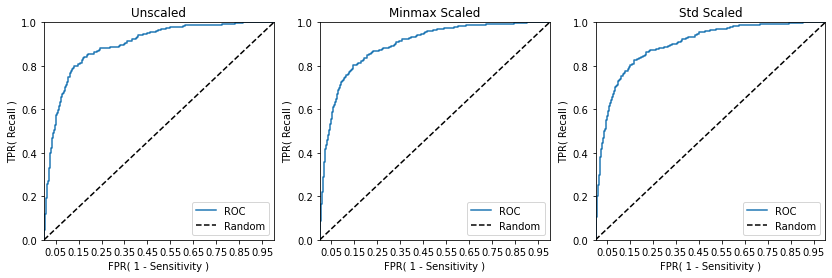

In [19]:
param_grid_linear_svc = {'model__C':np.arange(0.01, 100, 10), 'model__max_iter':[10000]}
svc_results, svc_probas = pipeline_generator(model_idx=0, params=param_grid_linear_svc, cv=3)

In not more than 50 words, present your observations on the effects of C and feature scaling on model performance.

Answer : From the result above, we can see that minmax sacling has slightly decreaseed svc model accuracy. However, the difference between scores are within 0.01 or 0.02 (Weighted avg in f1-score)  which is very small . So, we can cosider that scores with and without scaling are almost the same for linear svc.

-----

## Logistic Regression

Best parameter(Unscaled):  {'model__C': 5, 'model__penalty': 'l2'}
Best parameter(MinMax Scaled):  {'model__C': 10, 'model__penalty': 'l2'}
Best parameter(Std Scaled):  {'model__C': 5, 'model__penalty': 'l2'}

Best score(Unscaled):  0.8839213300892133
Best score(MinMax Scaled):  0.8805758313057583
Best score(Std Scaled):  0.8821978913219789

Classification report - Unscaled
              precision    recall  f1-score   support

       False       0.90      0.97      0.94      2098
        True       0.72      0.39      0.50       368

    accuracy                           0.89      2466
   macro avg       0.81      0.68      0.72      2466
weighted avg       0.87      0.89      0.87      2466


Classification report - MinMax Scaled
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2098
        True       0.76      0.39      0.52       368

    accuracy                           0.89      2466
   macro avg       0.83      0.69      

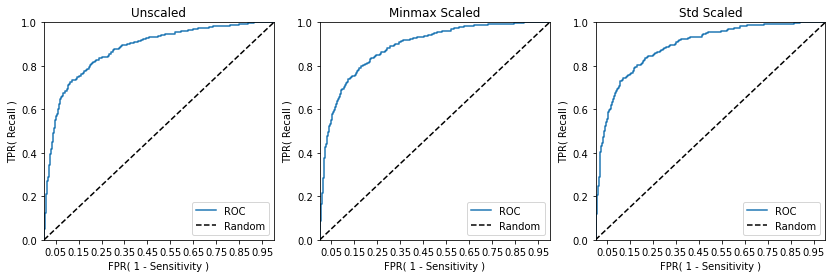

In [20]:
param_grid_logistic_regression = {'model__C':[0.01, 0.1, 1, 1, 5, 10], 'model__penalty':['l2', 'l1']}
lr_results, lr_probas = pipeline_generator(model_idx=1, params=param_grid_logistic_regression, cv=3)

In not more than 50 words, present your observations on the effects of C and feature scaling
on model performance. This explanation should summarize your observations from the experiments above. You can use a text box (i.e. Markdown Cell) in Jupyter to write down your
analysis. Feel free to experiment with other hyperparameters as well.  

Answer : From the result above, we can see that minmax sacling has slightly decreaseed svc model accuracy. However, the difference between scores are within 0.01 or 0.02 (Weighted avg in f1-score)  which is very small . So, we can cosider that scores with and without scaling are almost the same for linear svc.

-----

## KNN

Best parameter(Unscaled):  {'model__n_neighbors': 10}
Best parameter(MinMax Scaled):  {'model__n_neighbors': 10}
Best parameter(Std Scaled):  {'model__n_neighbors': 10}

Best score(Unscaled):  0.8608069748580697
Best score(MinMax Scaled):  0.8481346309813462
Best score(Std Scaled):  0.8554339010543389

Classification report - Unscaled
              precision    recall  f1-score   support

       False       0.88      0.99      0.93      2098
        True       0.77      0.23      0.35       368

    accuracy                           0.87      2466
   macro avg       0.83      0.61      0.64      2466
weighted avg       0.86      0.87      0.84      2466


Classification report - MinMax Scaled
              precision    recall  f1-score   support

       False       0.86      0.99      0.92      2098
        True       0.68      0.11      0.19       368

    accuracy                           0.86      2466
   macro avg       0.77      0.55      0.56      2466
weighted avg       0.84  

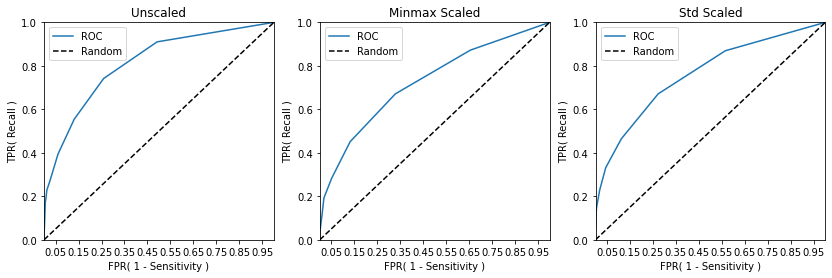

In [21]:
param_grid_knn = {'model__n_neighbors':(1, 3, 10)}
knn_results, knn_probas = pipeline_generator(model_idx=2, params=param_grid_knn, cv=3)

In not more than 50 words, present your observations on the effect of n neighbors and feature
scaling on model performance. This explanation should summarize your observations from
the experiments above. You can use a text box (i.e. Markdown Cell) in Jupyter to write down
your analysis. Feel free to experiment with other hyperparameters as well.  


Answer: From the result above, we can see that both minmax scaling and standard scaling have decreased model score(weighted avg in f1-score). However, the difference between scores are around 0.02 which is very small Therefore, it can be concluded thatt scaling had almost no effect on score.

-----

# Assignment 2b

## Decision Tree

Best parameter(Unscaled):  {'model__max_depth': 6, 'model__max_features': 'auto', 'model__min_samples_leaf': 2, 'model__min_samples_split': 16}
Best parameter(MinMax Scaled):  {'model__max_depth': 16, 'model__max_features': 'auto', 'model__min_samples_leaf': 16, 'model__min_samples_split': 4}
Best parameter(Std Scaled):  {'model__max_depth': 12, 'model__max_features': 'auto', 'model__min_samples_leaf': 16, 'model__min_samples_split': 4}

Best score(Unscaled):  0.8871654501216545
Best score(MinMax Scaled):  0.8871654501216545
Best score(Std Scaled):  0.8899026763990268

Classification report - Unscaled
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2098
        True       0.69      0.29      0.41       368

    accuracy                           0.87      2466
   macro avg       0.79      0.64      0.67      2466
weighted avg       0.86      0.87      0.85      2466


Classification report - MinMax Scaled
              precision  

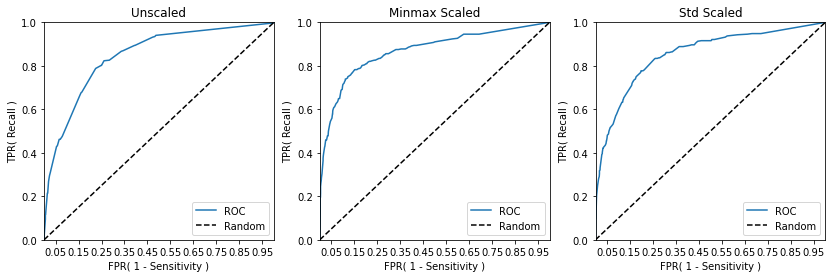

In [22]:
param_grid_tree_clf = {'model__max_depth': [4, 6, 8, 10, 12, 16, 20, 24],
                       'model__max_features': ['auto', 'sqrt', 'log2'],
                       'model__min_samples_leaf': [2, 4, 6, 8, 16] ,
                       'model__min_samples_split': [4, 6, 8, 16, 24] }
tree_results, tree_probas = pipeline_generator(model_idx=3, params=param_grid_tree_clf, cv=3)

Decision Tree Unscaled


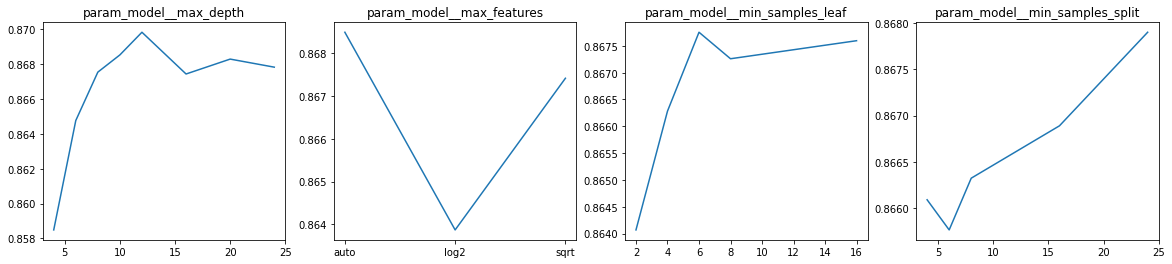

Decision Tree MinMax Scaled


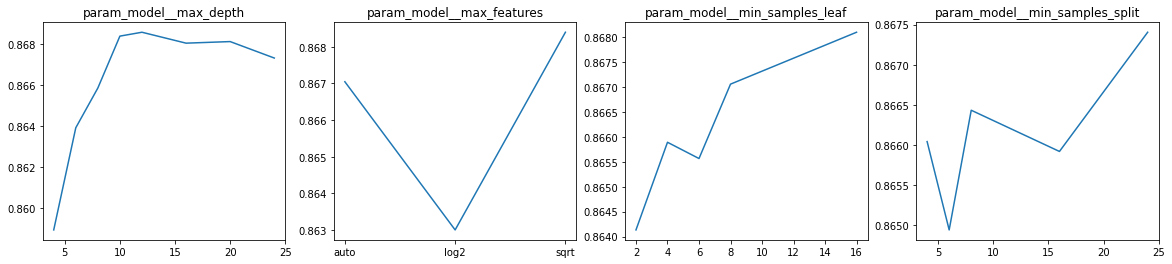

Decision Tree STD Scaled


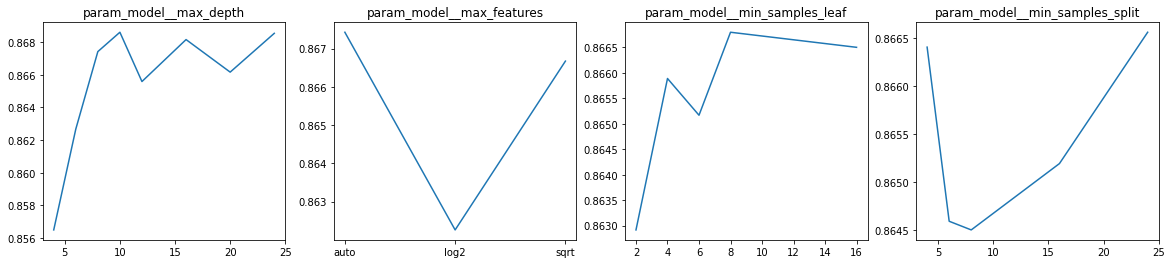

In [24]:
# Discover the effect of hyper parameter tuning

df_tree_unscaled_results = pd.DataFrame(tree_results[0])
df_tree_minmax_results = pd.DataFrame(tree_results[1])
df_tree_std_results = pd.DataFrame(tree_results[2])
plotnames = ['Decision Tree Unscaled', 'Decision Tree MinMax Scaled', 'Decision Tree STD Scaled']

for idx1, r in enumerate([df_tree_unscaled_results, df_tree_minmax_results, df_tree_std_results]):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
    print(plotnames[idx1])
    for idx2, p in enumerate(r.columns[4:8]):
        grouped = r.groupby(p).mean().reset_index()
        axes[idx2].plot(grouped[p], grouped['mean_test_score'])
        axes[idx2].set_title(p)
    plt.show()


In less than 50 words, explain your observations and your assessment of the classifier. You can use a text box (i.e. Markdown Cell) in Jupyter to write down your analysis.  


----- 
Analyze the effects of data preprocessing operations like scaling on the classification performance of a decision tree classifier.
- Are these models resilient to overfitting when model hyper-parameters have not been carefully selected? Supplement your explanation with suitable figures/tables if necessary.

From the results shown above there is no impact on scaling. Since each feature is individually processed to divide the data, it is not affected by the data scale, so there is no need for data pre-processing such as normalization or standardization in the decision tree algorithms.  

Second plots show changes of mean test scores due to the change of parameters. We wanted to analyze the effect of overfitting when parameters are too low or too high.  
Therefore, we grouped the mean of mean test scores (since *GridSearchCV* looks out for all possibilities of different values other parameters) by parameter we wanted to analyze.  
According to the results, first, in the case of the parameter of max_depth that defines the maximum depth of the tree, it was confirmed that overfitting occurred after a certain depth, showing decrease in the test score of cross validation. In addition, it was also confirmed that the tendency of overfitting when parameter values are too low or high.

## Random Forest

Best parameter(Unscaled):  {'model__max_depth': 12, 'model__max_features': 'auto', 'model__min_samples_leaf': 6, 'model__min_samples_split': 8, 'model__n_estimators': 100}
Best parameter(MinMax Scaled):  {'model__max_depth': 12, 'model__max_features': 'auto', 'model__min_samples_leaf': 6, 'model__min_samples_split': 8, 'model__n_estimators': 100}
Best parameter(Std Scaled):  {'model__max_depth': 12, 'model__max_features': 'auto', 'model__min_samples_leaf': 6, 'model__min_samples_split': 8, 'model__n_estimators': 100}

Best score(Unscaled):  0.8941605839416059
Best score(MinMax Scaled):  0.8941605839416059
Best score(Std Scaled):  0.894059205190592

Classification report - Unscaled
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2098
        True       0.76      0.47      0.58       368

    accuracy                           0.90      2466
   macro avg       0.84      0.72      0.76      2466
weighted avg       0.89      0.90     

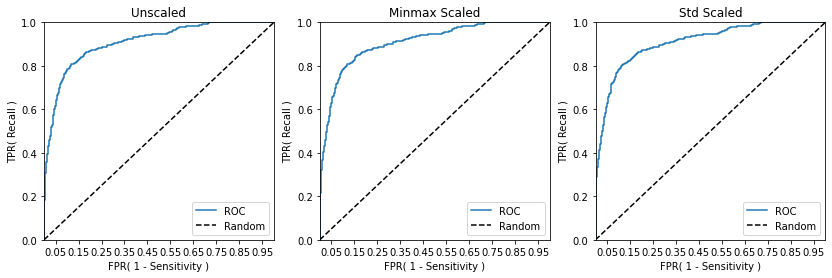

In [25]:
param_grid_rf = {'model__n_estimators': [1, 100],
                 'model__max_depth': [6, 8, 10, 12],
                 'model__max_features': ['auto', 'sqrt', 'log2'],
                 'model__min_samples_leaf': [6, 8, 12, 16],
                 'model__min_samples_split': [8, 16, 24]}
rf_results, rf_probas = pipeline_generator(model_idx=4, params=param_grid_rf, cv=3)

In no more than 50 words, explain your observations and your assessment of the classifier. You can use a text box (i.e. Markdown Cell) in Jupyter to write down your analysis.
- Analyze the effects of data preprocessing operations like scaling on the classification performance of a random forest classifier and comment on its tendency to overfit to data.
-----

As can be seen from the evaluation results of our above models, the random forest is based on the decision tree algorithm, so it is not highly dependent on whether or not the feature is scaled.  
  
Next, we wanted to discover the difference of random forest and decision tree in light of analyzing the improvement on the scoring metric. So we set *n_estimators* parameter to 1 and 100 (n_estimator=1 is equivalent to single tree which is same as decision tree).

In [26]:
df_rf_unscaled_results = pd.DataFrame(rf_results[0])
df_rf_minmax_results = pd.DataFrame(rf_results[1])
df_rf_std_results = pd.DataFrame(rf_results[2])

df_rf_unscaled_results.groupby(['param_model__n_estimators', 
                                'param_model__max_depth', 
                                'param_model__max_features', 
                                'param_model__min_samples_leaf',
                                'param_model__min_samples_split'])['mean_test_score'].mean().unstack()

param_model__min_samples_split                                                                                  8   ...        24
param_model__n_estimators param_model__max_depth param_model__max_features param_model__min_samples_leaf            ...          
1                         6                      auto                      6                              0.859084  ...  0.869830
                                                                           8                              0.855535  ...  0.856042
                                                                           12                             0.855738  ...  0.855738
                                                                           16                             0.870641  ...  0.870641
                                                 log2                      6                              0.852190  ...  0.852899
...                                                                                                            ...  ...       ...
100                       12                     log2                      16                             0.876723  ...  0.876723
                                                 sqrt                      6                              0.894161  ...  0.892640
                                                                           8                              0.892133  ...  0.892032
                                                                           12                             0.892741  ...  0.892741
                                                                           16                             0.891221  ...  0.891221

[96 rows x 3 columns]

The above table shows that in every other parameter settings, random forest with 100 trees showed better score than from a single tree.

- How are decision tree classifiers different from random forests on a structural level? (max.
50 words)
- Where would you choose decision trees over random forests and vice-versa? Demonstrate
this using an appropriate example from your data. (max. 50 words)  

Decision trees create a single tree from the entire data, whereas random forest is an ensemble model of multiple trees. Each tree generated from each subset returns one result, and overall, the most frequent result among all trees is taken as the final result.  
We decided to choose random forest over decision tree since validation results from test data are better, and it can be a better solution from overfitting problems in decision trees. Some of the trees generated in the random forest can be overfitted, but by creating a large number of trees, it prevents overfitted trees from having a significant impact on predicting outcomes.

## Model Evaluation
- Is accuracy an appropriate evaluation metric for this classification task? Justify in less than
20 words  
  
- Can you select an optimal model for this task from the ROC curves? Justify in less than 20
words

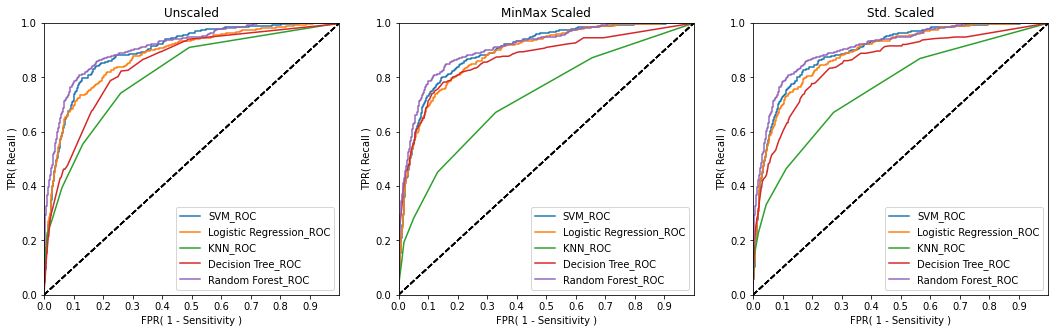

In [27]:
# Compare ROC curves all above models

probas = [svc_probas, lr_probas, knn_probas, tree_probas, rf_probas]
model_names = ['SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
subplot_titles = ['Unscaled', 'MinMax Scaled', 'Std. Scaled']

fig, axes = plt.subplots(figsize=(18, 5), ncols=3)
for p in range(5):
    for i in range(3):
        fprs, tprs, thresholds = roc_curve(y_test, probas[p][i])
        axes[i].plot(fprs, tprs, label=model_names[p]+'_ROC')
        axes[i].plot([0, 1], [0, 1], 'k--', label=None)
        start, end = axes[i].set_xlim()
        axes[i].set_xticks(np.round(np.arange(start, end, 0.1), 2))
        axes[i].set_xlim(0, 1); axes[i].set_ylim(0, 1)
        axes[i].set_xlabel('FPR( 1 - Sensitivity )'); axes[i].set_ylabel('TPR( Recall )')
        axes[i].set_title(subplot_titles[i])
        axes[i].legend()
plt.show()

- Is accuracy an appropriate evaluation metric for this classification task? Justify in less than
20 words  
    : Since the distribution of the target variable is unbalanced, f1-score, should be used as the evaluation metric.  
  
- Can you select an optimal model for this task from the ROC curves? Justify in less than 20
words  
    : Random forest, since its ROC curve is most far from the middle straight line under all feature scaling conditions.